In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Aircraft%20Accidents%2C%20Failures%20%26%20Hijacks%20Dataset/Aircraft_Incident_Dataset.csv")
dataset.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


In [5]:
dataset.isnull().sum()

Incident_Date               0
Aircaft_Model               0
Aircaft_Registration     1561
Aircaft_Operator            0
Aircaft_Nature              0
Incident_Category           0
Incident_Cause(es)          0
Incident_Location         932
Aircaft_Damage_Type         0
Date                        0
Time                    14316
Arit                        0
Aircaft_Engines         12883
Onboard_Crew                0
Onboard_Passengers          0
Onboard_Total               0
Fatalities                  0
Aircaft_First_Flight     5488
Aircraft_Phase              0
Departure_Airport           0
Destination_Airport         0
Ground_Casualties       23172
Collision_Casualties    23227
dtype: int64

In [6]:
dropped_dataset = dataset.drop (columns=['Ground_Casualties', 'Collision_Casualties'])
dropped_dataset.columns.tolist()

['Incident_Date',
 'Aircaft_Model',
 'Aircaft_Registration',
 'Aircaft_Operator',
 'Aircaft_Nature',
 'Incident_Category',
 'Incident_Cause(es)',
 'Incident_Location',
 'Aircaft_Damage_Type',
 'Date',
 'Time',
 'Arit',
 'Aircaft_Engines',
 'Onboard_Crew',
 'Onboard_Passengers',
 'Onboard_Total',
 'Fatalities',
 'Aircaft_First_Flight',
 'Aircraft_Phase',
 'Departure_Airport',
 'Destination_Airport']

In [7]:
dropped_dataset['Incident_Day'] = dropped_dataset['Incident_Date'].str[:2]
dropped_dataset['Incident_Month'] = dropped_dataset['Incident_Date'].str[3:6]
dropped_dataset['Incident_Year'] = dropped_dataset['Incident_Date'].str[-4:]

dropped_dataset.head()

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Onboard_Passengers,Onboard_Total,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Incident_Month,Incident_Year
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,JAN,2022
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,JAN,2022
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,JAN,2022
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,JAN,2022
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,12,JAN,2022


In [8]:
dataset.Date.str.len().value_counts()

22    3780
23    3712
21    2961
24    2925
20    2601
25    2228
19    2138
18    1197
26    1036
11     503
17     224
27     210
10       4
Name: Date, dtype: int64

In [9]:
dropped_dataset[['Incident_Type', 'Incident_Damage_State']] = dropped_dataset['Incident_Category'].str.split("|", expand=True)
dropped_dataset['Incident_Cause(es)'].unique()

array(['Airplane - Engines, Airplane - Engines - Prop/turbine blade separation, Collision - Object, Collision - Object - Bird, Result - Emergency, forced landing - On runway',
       'Airplane - Undercarriage, Airplane - Undercarriage - Landing gear collapse, Result - Runway mishap',
       'Cargo - Fire/smoke, Result - Damaged on the ground', ...,
       'Fire - Inflight, Result - Loss of control, Unknown - Cause undetermined',
       'Airplane - Undercarriage, Airplane - Undercarriage - Gear-up landing, ATC & navigation - VFR flight in IMC, Result - Emergency, forced landing - Outside airport',
       'Airplane - Flight control surfaces, Airplane - Flight control surfaces - Rudder, Result - Emergency, forced landing - Outside airport'],
      dtype=object)

In [10]:
dropped_dataset.isnull().sum()

Incident_Date                0
Aircaft_Model                0
Aircaft_Registration      1561
Aircaft_Operator             0
Aircaft_Nature               0
Incident_Category            0
Incident_Cause(es)           0
Incident_Location          932
Aircaft_Damage_Type          0
Date                         0
Time                     14316
Arit                         0
Aircaft_Engines          12883
Onboard_Crew                 0
Onboard_Passengers           0
Onboard_Total                0
Fatalities                   0
Aircaft_First_Flight      5488
Aircraft_Phase               0
Departure_Airport            0
Destination_Airport          0
Incident_Day                 0
Incident_Month               0
Incident_Year                0
Incident_Type                0
Incident_Damage_State        0
dtype: int64

In [11]:
dropped_dataset.head(2)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Incident_Month,Incident_Year,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,JAN,2022,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,JAN,2022,Accident,repairable-damage


In [12]:
non_fatal_accidents = (dropped_dataset[dropped_dataset['Fatalities'] == 0])
non_fatal_accidents.head(5)

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Incident_Month,Incident_Year,Incident_Type,Incident_Damage_State
0,03-JAN-2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",03,JAN,2022,Accident,repairable-damage
1,04-JAN-2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,04,JAN,2022,Accident,repairable-damage
2,05-JAN-2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",05,JAN,2022,Accident,repairable-damage
3,08-JAN-2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",08,JAN,2022,Accident,hull-loss
4,12-JAN-2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,0,NaN,Standing (STD),?,?,12,JAN,2022,"Criminal occurrence (sabotage, shoot down)",hull-loss


In [13]:
fatal_accidents = (dropped_dataset[dropped_dataset['Fatalities'] >0])
fatal_accidents.Incident_Type.unique()

array(['Accident ', 'Criminal occurrence (sabotage, shoot down) ',
       'Hijacking ', 'other occurrence (ground fire, sabotage) ',
       'occurrence unknown '], dtype=object)

In [14]:
fatal_incident_types = ['Accident ', 'Criminal occurrence (sabotage, shoot down) ',
 'other occurrence (ground fire, sabotage) ', 'Hijacking ',
 'occurrence unknown ', 'Incident ']
arg_accident = fatal_accidents['Incident_Type'] == 'Accident '
arg_criminal = fatal_accidents['Incident_Type'] == 'Criminal occurrence (sabotage, shoot down) '
arg_hijack = fatal_accidents['Incident_Type'] == 'Hijacking '
arg_other_ground = fatal_accidents['Incident_Type'] == 'other occurrence (ground fire, sabotage) '
arg_unknown = fatal_accidents['Incident_Type'] == 'occurrence unknown '

fatal_accident = fatal_accidents[arg_accident]
fatal_criminal = fatal_accidents[arg_criminal]
fatal_hijack = fatal_accidents[arg_hijack]
fatal_other_ground = fatal_accidents[arg_other_ground]
fatal_unknown = fatal_accidents[arg_unknown]

fatal_accident_count = len(fatal_accident)
fatal_criminal_count = len(fatal_criminal)
fatal_hijack_count = len(fatal_hijack)
fatal_other_ground_count = len(fatal_other_ground)
fatal_unknown_count = len(fatal_unknown)

fatal_accident_count 

8508

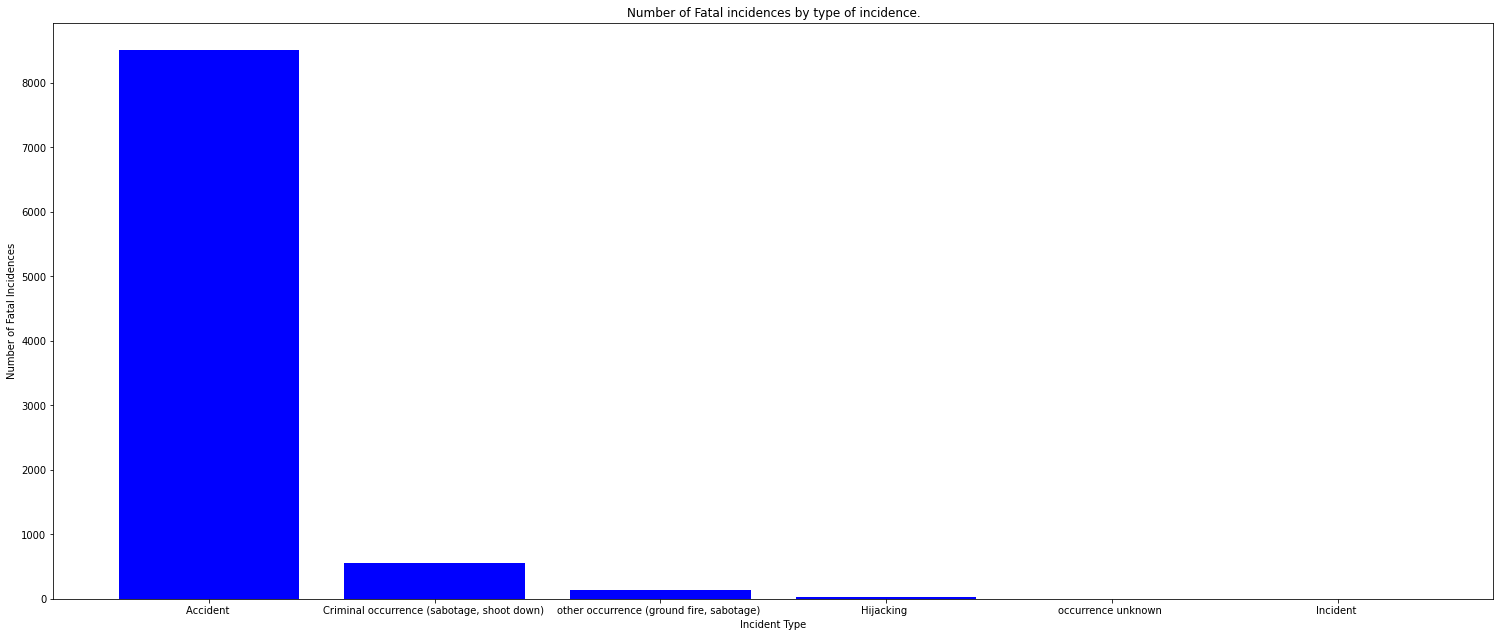

In [15]:
fatal_incident_counts = []
fatal_incident_counts.append(fatal_accident_count)
fatal_incident_counts.append(fatal_criminal_count)
fatal_incident_counts.append(fatal_hijack_count)
fatal_incident_counts.append(fatal_other_ground_count)
fatal_incident_counts.append(fatal_unknown_count)
fatal_incident_counts.append(0)
fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
incidence_types_plot = fatal_incident_types
incidence_count_plot = fatal_incident_counts
ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Fatal Incidences')
ax.set_title('Number of Fatal incidences by type of incidence.')
ax.bar(incidence_types_plot,incidence_count_plot, color='b')
plt.show()

In [16]:
non_fatal_accidents.Incident_Type.unique()

array(['Accident ', 'Criminal occurrence (sabotage, shoot down) ',
       'other occurrence (ground fire, sabotage) ', 'Hijacking ',
       'occurrence unknown ', 'Incident '], dtype=object)

['Accident ' 'Criminal occurrence (sabotage, shoot down) '
 'other occurrence (ground fire, sabotage) ' 'Hijacking '
 'occurrence unknown ' 'Incident ']


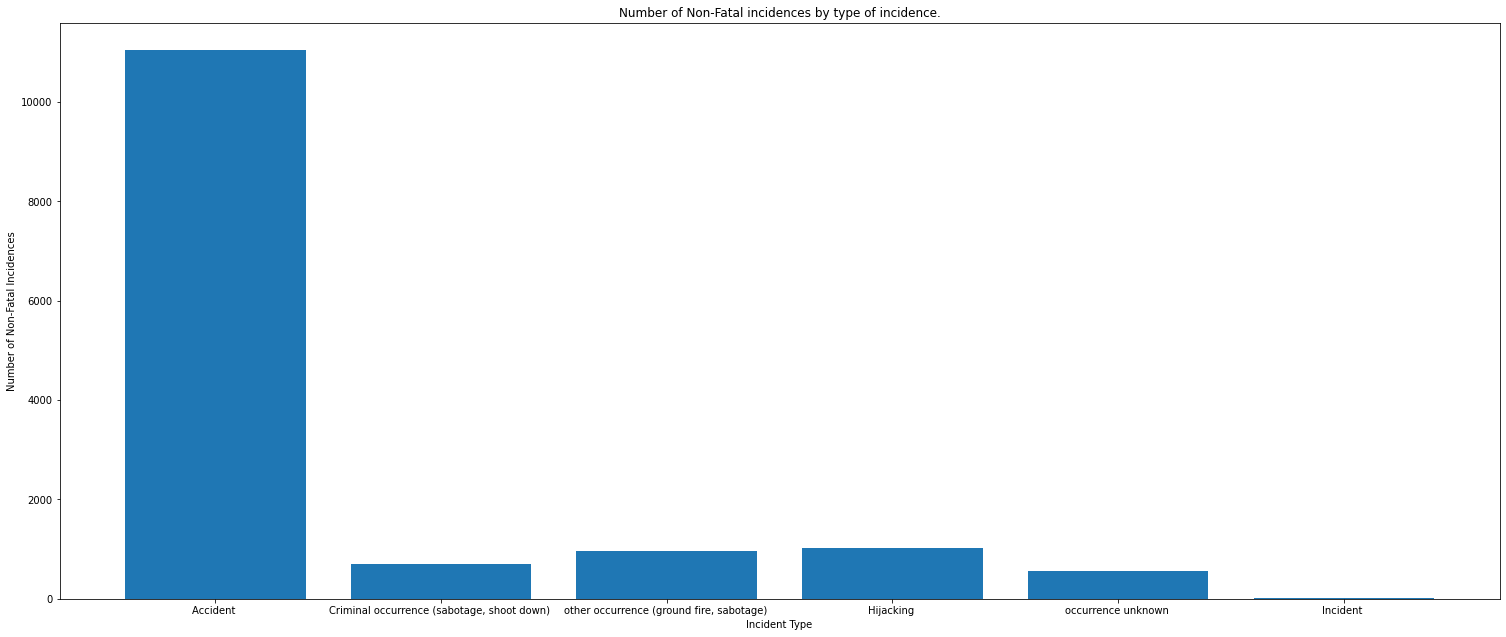

In [17]:
non_fatal_incident_types = non_fatal_accidents['Incident_Type'].unique()

print(non_fatal_incident_types)
arg_accident_nf = non_fatal_accidents['Incident_Type'] == 'Accident '
arg_criminal_nf = non_fatal_accidents['Incident_Type'] == 'Criminal occurrence (sabotage, shoot down) '
arg_hijack_nf = non_fatal_accidents['Incident_Type'] == 'Hijacking '
arg_other_ground_nf = non_fatal_accidents['Incident_Type'] == 'other occurrence (ground fire, sabotage) '
arg_unknown_nf = non_fatal_accidents['Incident_Type'] == 'occurrence unknown '
arg_incident_nf = non_fatal_accidents['Incident_Type'] == 'Incident '

non_fatal_accident = non_fatal_accidents[arg_accident_nf]
non_fatal_criminal = non_fatal_accidents[arg_criminal_nf]
non_fatal_hijack = non_fatal_accidents[arg_hijack_nf]
non_fatal_other_ground = non_fatal_accidents[arg_other_ground_nf]
non_fatal_unknown = non_fatal_accidents[arg_unknown_nf]
non_fatal_incident = non_fatal_accidents[arg_incident_nf]

non_fatal_accident_count = len(non_fatal_accident)
non_fatal_criminal_count = len(non_fatal_criminal)
non_fatal_hijack_count = len(non_fatal_hijack)
non_fatal_other_ground_count = len(non_fatal_other_ground)
non_fatal_unknown_count = len(non_fatal_unknown)
non_fatal_incident_count = len(non_fatal_incident)

non_fatal_incident_counts = []
non_fatal_incident_counts.append(non_fatal_accident_count)
non_fatal_incident_counts.append(non_fatal_criminal_count)
non_fatal_incident_counts.append(non_fatal_hijack_count)
non_fatal_incident_counts.append(non_fatal_other_ground_count)
non_fatal_incident_counts.append(non_fatal_unknown_count)
non_fatal_incident_counts.append(non_fatal_incident_count)

fig = plt.figure(figsize=(20,8))
ax = fig.add_axes([0,0,1,1])
nf_incidence_types_plot = non_fatal_incident_types
nf_incidence_count_plot = non_fatal_incident_counts
ax.set_xlabel('Incident Type')
ax.set_ylabel('Number of Non-Fatal Incidences')
ax.set_title('Number of Non-Fatal incidences by type of incidence.')
ax.bar(non_fatal_incident_types,nf_incidence_count_plot)
plt.show()

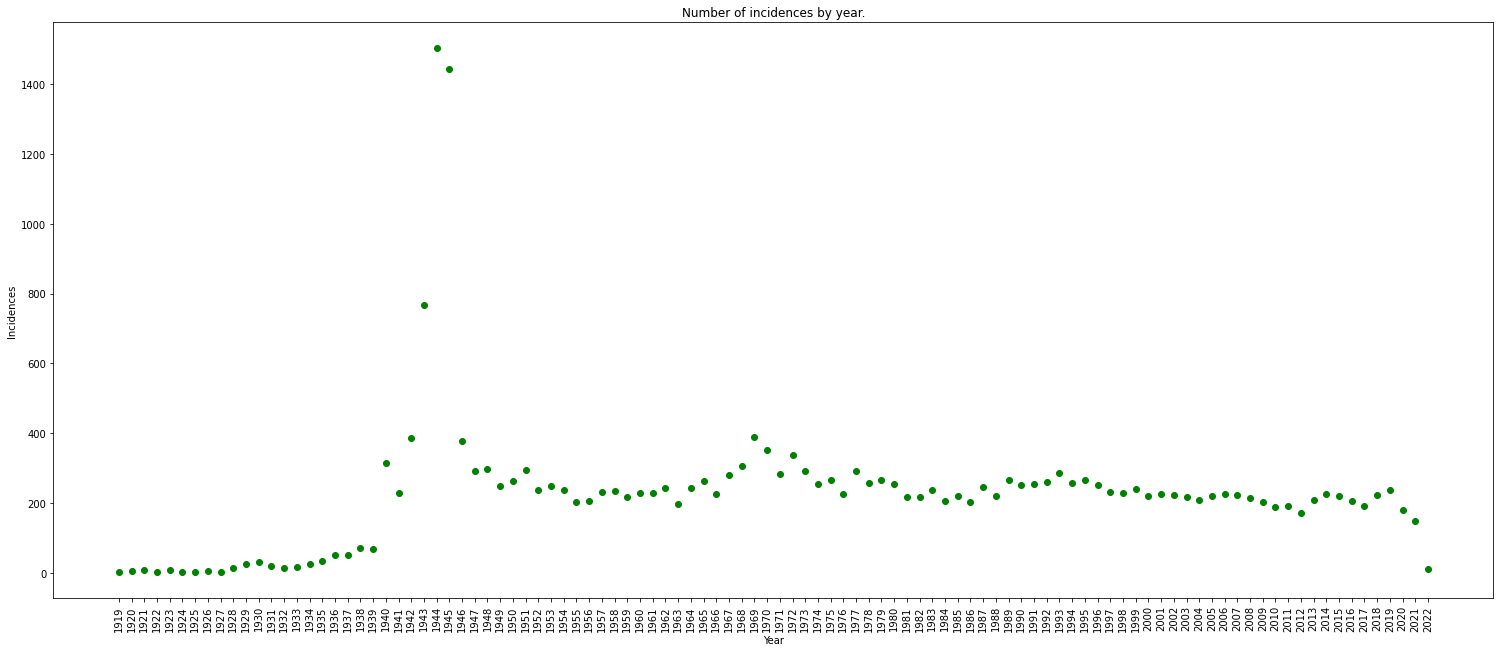

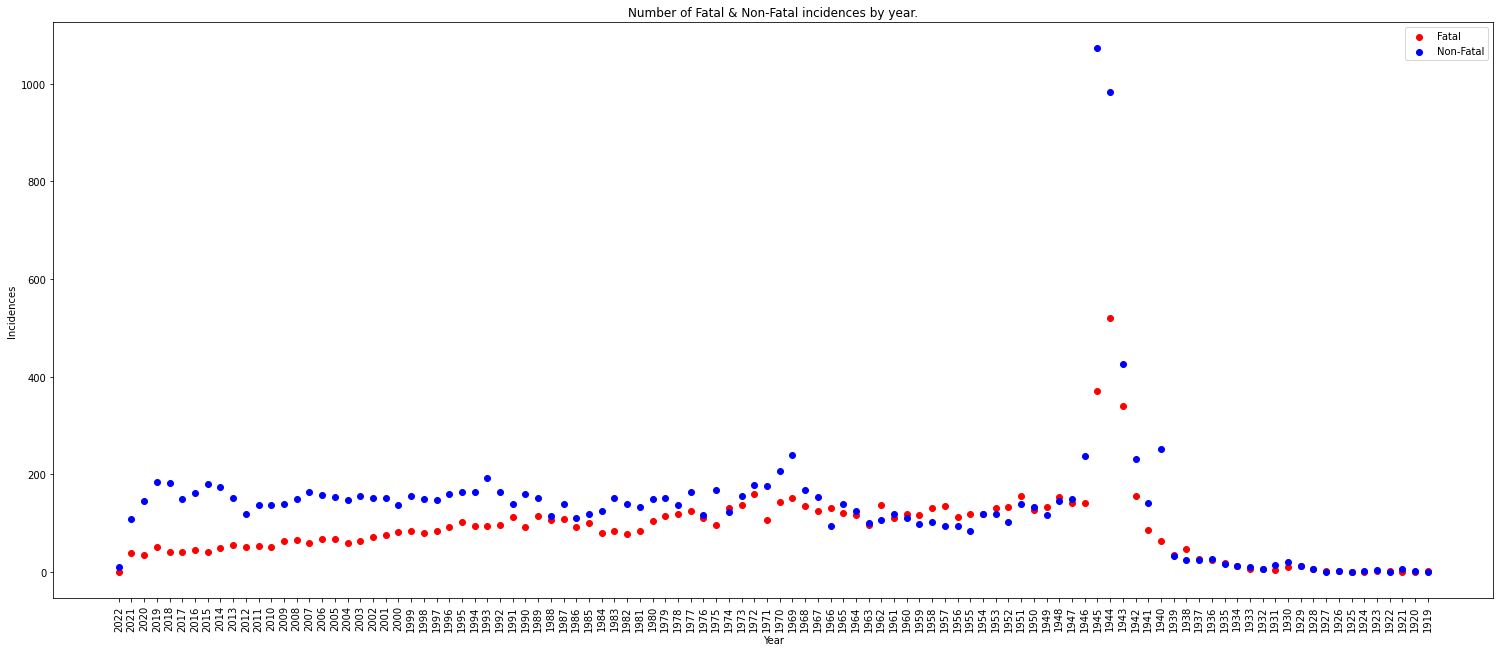

In [18]:
unique_incident_year = dropped_dataset['Incident_Year'].unique()


unique_incident_year=unique_incident_year[::-1]
unique_incident_year
most_impacted_year = 0
instances_in_current_year = 0
total_instances_by_year = []


for year in unique_incident_year:
    fatal_year_arg = fatal_accidents['Incident_Year'] == year
    non_fatal_year_arg = non_fatal_accidents['Incident_Year'] == year
    
    fatal_year_incidences = fatal_accidents[fatal_year_arg]
    non_fatal_year_incidences = non_fatal_accidents[non_fatal_year_arg]
    
    total_incidences = len(fatal_year_incidences) + len(non_fatal_year_incidences)
    
    total_instances_by_year.append(total_incidences)

    
fig=plt.figure(figsize=(20,8))
ax=fig.add_axes([0,0,1,1])
ax.scatter(unique_incident_year, total_instances_by_year, color='g')
ax.set_xlabel('Year')
plt.xticks(rotation=90)
ax.set_ylabel('Incidences')
ax.set_title('Number of incidences by year.')
plt.show()

unique_incident_year = dropped_dataset['Incident_Year'].unique()
most_impacted_year = 0
instances_in_current_year = 0
fatal_incidences_by_year = []
non_fatal_incidences_by_year = []

for year in unique_incident_year:
    fatal_year_arg = fatal_accidents['Incident_Year']==year
    non_fatal_year_arg = non_fatal_accidents['Incident_Year'] == year
    
    
    fatal_year_incidences = fatal_accidents[fatal_year_arg]
    non_fatal_year_incidences = non_fatal_accidents[non_fatal_year_arg]
    
    total_incidences = len(fatal_year_incidences) + len(non_fatal_year_incidences)
    
    if total_incidences > int(instances_in_current_year):
        instances_in_current_year = total_incidences
        most_impacted_year = year
    fatal_incidences_by_year.append(len(fatal_year_incidences))
    non_fatal_incidences_by_year.append(len(non_fatal_year_incidences))
    
fig=plt.figure(figsize=(20,8))
ax=fig.add_axes([0,0,1,1])
ax.scatter(unique_incident_year, fatal_incidences_by_year, color='r', label="Fatal")
ax.scatter(unique_incident_year, non_fatal_incidences_by_year, color='b', label="Non-Fatal")
ax.set_xlabel('Year')
ax.set_ylabel('Incidences')
plt.xticks(rotation=90)
ax.set_title('Number of Fatal & Non-Fatal incidences by year.')
ax.legend()
plt.show()

In [19]:
 dropped_dataset[dropped_dataset['Aircaft_Nature']   == 'Military']

,Incident_Date,Aircaft_Model,Aircaft_Registration,Aircaft_Operator,Aircaft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircaft_Damage_Type,Date,...,Fatalities,Aircaft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Incident_Day,Incident_Month,Incident_Year,Incident_Type,Incident_Damage_State
6,31-JAN-2022,Beechcraft B300 King Air 350,C-GEAS,"Air Tindi, opf RCAF",Military,Accident | repairable-damage,Result - Runway excursion,Thunder Bay ...,Substantial,Monday 31 January 2022,...,0,1990,Landing (LDG),"Trenton Canadian Forces Base, ON (YTR/CYTR) , ...","Thunder Bay Airport, ON (YQT/CYQT) , Canada",31,JAN,2022,Accident,repairable-damage
8,08-FEB-2022,Antonov An-26,SP-402,South Sudanese Air Force,Military,Accident | repairable-damage,Info-Unavailable,Agok Airstrip,Substantial,Tuesday 8 February 2022,...,0,NaN,Landing (LDG),"Ajongthok Airstrip , South Sudan","Agok Airstrip , South Sudan",08,FEB,2022,Accident,repairable-damage
16,12-JAN-2021,Harbin Y-12-II,NaN,Kenyan AF,Military,Accident | hull-loss,Info-Unavailable,near Voi,Damaged beyond repair,Tuesday 12 January 2021,...,4,NaN,Unknown (UNK),"Nairobi-Moi Air Base (HKRE) , Kenya","Mombasa-Moi International Airport (MBA/HKMO) ,...",12,JAN,2021,Accident,hull-loss
22,26-JAN-2021,Harbin Yunshuji Y-12E,AF-222,Zambian Air Force,Military,Accident | repairable-damage,Result - Runway excursion,Mukinge Miss...,Substantial,Tuesday 26 January 2021,...,0,NaN,Landing (LDG),"Lusaka Airport (LUN/FLLS) , Zambia","Mukinge Mission Airstrip (FLGE) , Zambia",26,JAN,2021,Accident,repairable-damage
25,??-JAN-2021,Antonov An-2,NaN,KPAAF,Military,Accident | hull-loss,Result - Loss of control,near Taechon Air ...,Damaged beyond repair,xx JAN 2021,...,5,NaN,Initial climb (ICL),"Taechon Air Base , North Korea","Taechon Air Base , North Korea",??,JAN,2021,Accident,hull-loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23368,22-MAR-1933,Ford JR-3 (5-AT-C) Tri-Motor,A8599,USMC,Military,Accident | hull-loss,Info-Unavailable,Virginia Bea...,Damaged beyond repair,Wednesday 22 March 1933,...,0,1930-04-02 (3 years),Takeoff (TOF),"Quantico MCAF /Turner field, VA (KNYG) , Unite...",?,22,MAR,1933,Accident,hull-loss
23415,07-FEB-1930,Junkers R-42 (G.24),J6,Chilean AF,Military,Accident | hull-loss,"Result - Emergency, forced landing - Ditching",near Punta Arenas,Damaged beyond repair,Friday 7 February 1930,...,3,NaN,En route (ENR),"Puerto Montt-Marcel Marchant Airport (SCPF) , ...",Punta Arenas-Carlos Ibañez Airport (PUQ/SCCI) ...,07,FEB,1930,Accident,hull-loss
23433,04-AUG-1930,Ford JR-3 (5-AT-C) Tri-Motor,A8598,USMC,Military,Accident | hull-loss,Info-Unavailable,"Ocotal, Nuev...",Damaged beyond repair,Monday 4 August 1930,...,0,1929-12-27 (7 months),Landing (LDG),?,?,04,AUG,1930,Accident,hull-loss
23444,??-???-1930,Junkers JuG-1W (G.24),NaN,Soviet AF,Military,Accident | hull-loss,Info-Unavailable,NaN,Damaged beyond repair,xx xxx 1930,...,0,NaN,Unknown (UNK),?,?,??,???,1930,Accident,hull-loss


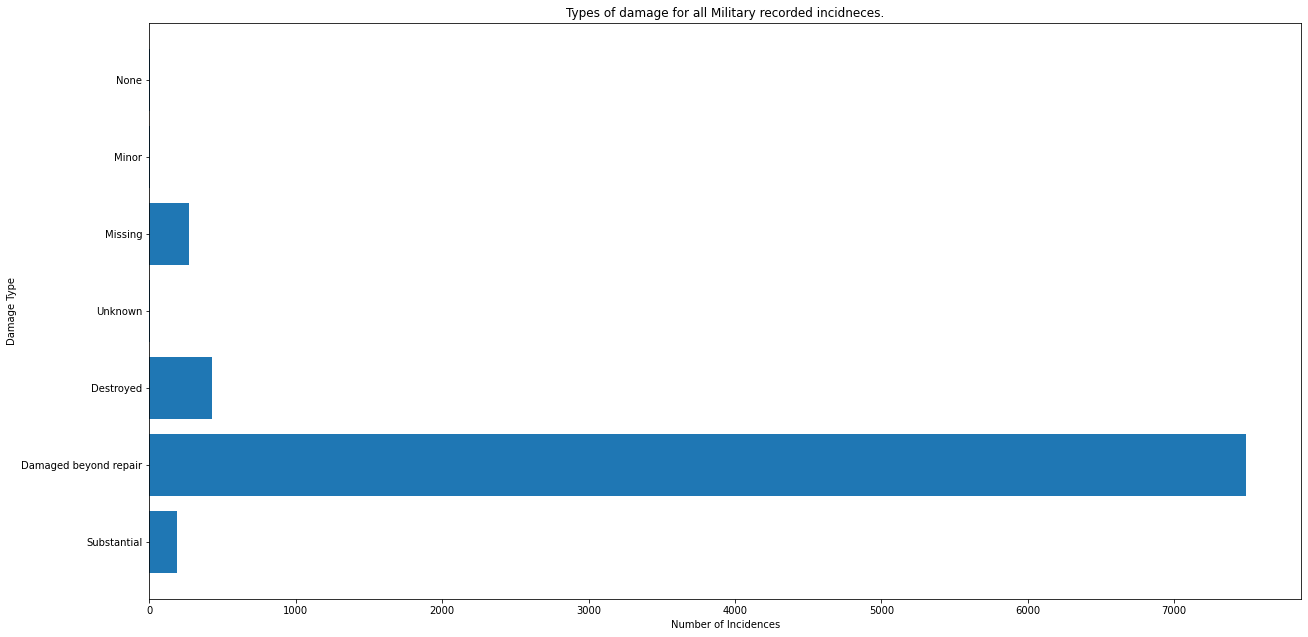

In [20]:
military_flight_arg = dropped_dataset['Aircaft_Nature'] == 'Military'
military_flight_dataset = dropped_dataset[military_flight_arg]
military_incidence_count = len(military_flight_dataset)
military_flight_type = military_flight_dataset['Aircaft_Damage_Type'].unique()
military_flight_type_couts = []

for incident_type in military_flight_type:
    military_type_arg = military_flight_dataset['Aircaft_Damage_Type'] == incident_type
    military_type_dataset = military_flight_dataset[military_type_arg]
    military_flight_type_couts.append(len(military_type_dataset))

fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0,0,1,1])
plt.barh(military_flight_type , military_flight_type_couts)
plt.title('Types of damage for all Military recorded incidneces.')
plt.ylabel('Damage Type')
plt.xlabel('Number of Incidences')
plt.show()